In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

inputpath1 = "E:/Masterzz/5152-ComputerVision/Project/superpoint/SuperPointPretrainedNetwork/assets/icl_snippet/250.png"
inputpath2 = "E:/Masterzz/5152-ComputerVision/Project/superpoint/SuperPointPretrainedNetwork/assets/icl_snippet/302.png"

img1 = cv2.imread(inputpath1,0)          # queryImage
img2 = cv2.imread(inputpath2,0) # trainImage

# Initiate SIFT detector
sift = cv2.xfeatures2d.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

In [71]:
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)

#matcher = cv2.FlannBasedMatcher(index_params, search_params)
matcher = cv2.BFMatcher()

In [72]:
matches = matcher.knnMatch(des1,des2,k=2)

In [73]:
des1.shape

(607, 128)

In [74]:
matchesMask = [[0,0] for i in range(len(matches))]

In [75]:
matchesFiltered = []
for i,(m,n) in enumerate(matches):
    if m.distance < n.distance * 0.7:
        matchesMask[i] = [1,0]
        matchesFiltered.append([m]) 

In [76]:
imMatched = cv2.drawMatchesKnn(img1, kp1, img2, kp2, matchesFiltered, None)

In [77]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


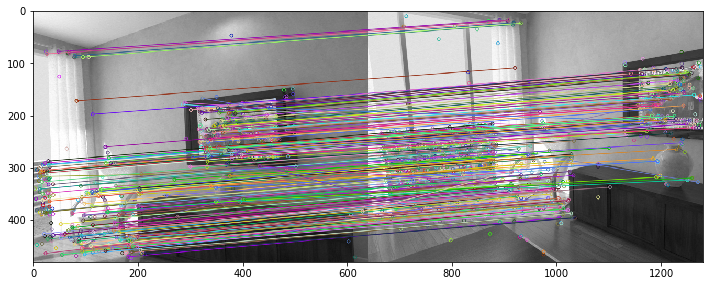

In [78]:
fig = figure(figsize = (12,8))
imshow(imMatched)

In [79]:
m = matchesFiltered[25]

In [88]:
len(matchesFiltered)

230

In [81]:
matc=m[0]

In [84]:
matc.queryIdx

91

In [111]:
skp = kp1[91]

In [101]:
points1 = []
points2 = []
if len(matchesFiltered) <= 10:
    print("Too Low matches, cannot compute Homography")
else:
    for i in range(len(matchesFiltered)):
        m = matchesFiltered[i]
        points2.append(kp2[m[0].trainIdx].pt)
        points1.append(kp1[m[0].queryIdx].pt)

In [103]:
points1 = np.array(points1)
points2 = np.array(points2)
HG, mask = cv2.findHomography(points1, points2, cv2.RANSAC, 5.0)

In [105]:
HG

array([[ 6.28498897e-01,  6.82744464e-02,  2.10983763e+02],
       [-1.24989400e-01,  9.82736506e-01, -5.18840787e+01],
       [-7.41377700e-04,  2.42403142e-04,  1.00000000e+00]])

In [107]:
stitched = cv2.warpPerspective(img1, HG, (img1.shape[1]+img2.shape[1], img1.shape[0]))

In [108]:
stitched[0:img2.shape[0], 0:img2.shape[1]] = img2

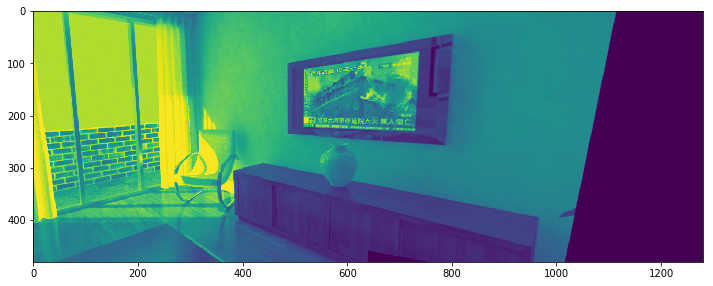

In [113]:
fig = figure(figsize = (12,8))
imshow(stitched)